In [1]:
import pandas as pd
from PIL import Image, ImageFilter
from numpy import array
from sklearn.model_selection import train_test_split
import glob
import numpy as np
import os

In [3]:
# Load in ALL train images and label them
X = []
y = []
for j in range(10):
    print('Load folder c{}'.format(j))
    path = os.path.join('C:/Users/buckf/Documents/MSDS 686/Code/Distracted Driver Project/Data/imgs', 'train', 'c' + str(j), '*.jpg')
    img_list = glob.glob(path)
    for file in img_list:
        img = Image.open(file).convert('L')
        height, width = img.size
        img.thumbnail((height/16, width/16), Image.ANTIALIAS)
        pix = np.array(img.getdata()).reshape(img.size[0], img.size[1], 1)
        X.append(pix)
        y.append(j)
    print("Number of train Images: %s" % len(X))
    
X = np.array(X, dtype = 'float32')
y = np.array(y, dtype = 'float32')
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, shuffle = True)

Load folder c0
Number of train Images: 2489
Load folder c1
Number of train Images: 4756
Load folder c2
Number of train Images: 7073
Load folder c3
Number of train Images: 9419
Load folder c4
Number of train Images: 11745
Load folder c5
Number of train Images: 14057
Load folder c6
Number of train Images: 16382
Load folder c7
Number of train Images: 18384
Load folder c8
Number of train Images: 20295
Load folder c9
Number of train Images: 22424


C:\Users\buckf\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
#Standardize the Pixel Data
X_train = X_train / 255
X_val = X_val / 255

In [5]:
X_train.shape

(17939, 40, 30, 1)

In [6]:
import time
import numpy
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator

import keras.utils as np_utils

C:\Users\buckf\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
#Make targets a categorical array.
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [8]:
print(y_train.shape)
print(y_train[2])

(17939, 10)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [10]:
print(X_train.shape)
print(X_train[2])

(17939, 40, 30, 1)
[[[0.08627451]
  [0.09803922]
  [0.11372549]
  ...
  [0.5882353 ]
  [0.4       ]
  [0.31764707]]

 [[0.3647059 ]
  [0.4       ]
  [0.54901963]
  ...
  [0.73333335]
  [0.76862746]
  [0.69803923]]

 [[0.73333335]
  [0.77254903]
  [0.69803923]
  ...
  [0.5568628 ]
  [0.4       ]
  [0.11764706]]

 ...

 [[0.05882353]
  [0.04313726]
  [0.03921569]
  ...
  [0.10196079]
  [0.21568628]
  [0.54901963]]

 [[0.5058824 ]
  [0.34117648]
  [0.49803922]
  ...
  [0.02352941]
  [0.03529412]
  [0.05882353]]

 [[0.0627451 ]
  [0.08235294]
  [0.09803922]
  ...
  [0.10196079]
  [0.02352941]
  [0.03529412]]]


In [12]:
num_pixels = X_train.shape[1] * X_train.shape[2]
num_classes = y_val.shape[1]

def simple_cnn_model():
    
    # create model
### YOUR TURN
# Build a model that has 1 convolution layer, 1 max pooling, 1 dense, and output 
# Use 32 filters with 5x5 size
# For max pooling layer, make the layer such that the featuremap size would be the half after the pooling layer
# hint: you need to change the argument input_shape to (w,h,1) in the first conv layer
# hint: you need Flatten() before the first dense layer
    model = Sequential()
    model.add(Conv2D(32, kernel_size = (5,5), activation = 'relu', input_shape = (40, 30, 1)))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(units = num_pixels, activation = 'relu'))
    model.add(Dense(units = num_classes, activation = 'sigmoid'))

    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy'])
    return model
    
# build the model
model = simple_cnn_model()

# Fit the model

t0 = time.time()
log = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=5, verbose=1)
t1 = time.time()
print(t1-t0, " seconds")
# Final evaluation of the model
scores = model.evaluate(X_val, y_val, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 17939 samples, validate on 4485 samples
Epoch 1/20
17939/17939 [==============================] - 84s 5ms/step - loss: 0.4640 - acc: 0.8520 - val_loss: 0.1132 - val_acc: 0.9679
Epoch 2/20
17939/17939 [==============================] - 79s 4ms/step - loss: 0.0871 - acc: 0.9750 - val_loss: 0.0934 - val_acc: 0.9753
Epoch 3/20
17939/17939 [==============================] - 78s 4ms/step - loss: 0.0493 - acc: 0.9865 - val_loss: 0.0645 - val_acc: 0.9810
Epoch 4/20
17939/17939 [==============================] - 78s 4ms/step - loss: 0.0562 - acc: 0.9857 - val_loss: 0.1171 - val_acc: 0.9744
Epoch 5/20
17939/17939 [==============================] - 77s 4ms/step - loss: 0.0276 - acc: 0.9925 - val_loss: 0.0877 - val_acc: 0.9848
Epoch 6/20
17939/17939 [==============================] - 77s 4ms/step - loss: 0.0402 - acc: 0.9915 - val_loss: 0.1271 - val_acc: 0.9730
Epoch 7/20
17939/17939 [==============================] - 77s 4ms/step - loss: 0.0294 - acc: 0.9928 - val_loss: 0.0455 - val_acc:

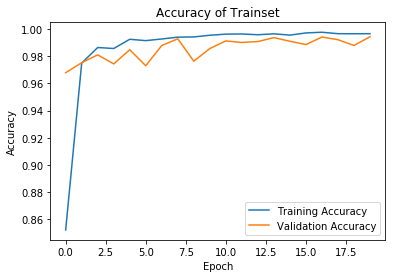

In [14]:
import matplotlib.pyplot as plt

plt.plot(log.history['acc'])
plt.plot(log.history['val_acc'])
plt.title('Accuracy of Trainset')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

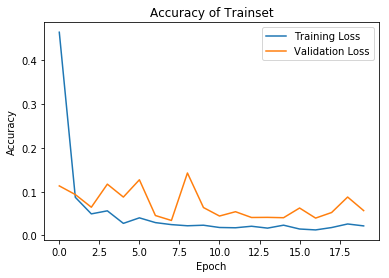

In [15]:
plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])
plt.title('Accuracy of Trainset')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [16]:
def inception2(x, n = 32):
    tower_1 = Conv2D(n, 1, padding = 'same', activation = 'relu')(x)
    tower_2 = Conv2D(n, 1, padding = 'same', activation = 'relu')(x)
    tower_3 = Conv2D(n, 1, padding = 'same', activation = 'relu')(x)
    tower_4 = MaxPooling2D(pool_size = (3,3), strides = (1,1), padding = 'same')(x)
    tower_2 = Conv2D(n, 3, padding = 'same', activation = 'relu')(tower_2)
    tower_3 = Conv2D(n, 5, padding = 'same', activation = 'relu')(tower_3)
    tower_4 = Conv2D(n, 1, padding = 'same', activation = 'relu')(tower_4)
    c = Concatenate(axis = -1)([tower_1, tower_2, tower_3, tower_4])
    return c

In [17]:
def model2(x):
    a = inception2(x)
    b = MaxPooling2D(pool_size = (2,2))(a)
    c = inception2(b)
    d = MaxPooling2D(pool_size = (2,2))(c)
    output = Flatten()(d)
    output = Dense(128, activation = 'relu')(output)
    output = Dense(10, activation = 'softmax')(output)
    model = Model(inputs = x, outputs = output)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

input_img = Input(shape=(40, 30, 1))
model = model2(input_img)

print(model.summary())

t0 = time.time()
log = model.fit(X_train,y_train, validation_data = (X_val, y_val), epochs = 20, batch_size = 5, verbose = 2)
t1 = time.time()
print(t1-t0, " seconds")

scores = model.evaluate(X_val, y_val, verbose = 0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 40, 30, 1)    0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 40, 30, 32)   64          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 40, 30, 32)   64          input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 40, 30, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (

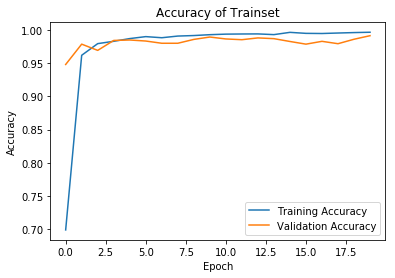

In [18]:
plt.plot(log.history['acc'])
plt.plot(log.history['val_acc'])
plt.title('Accuracy of Trainset')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

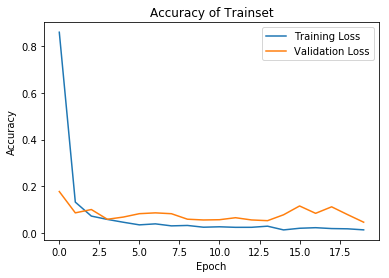

In [19]:
plt.plot(log.history['loss'])
plt.plot(log.history['val_loss'])
plt.title('Accuracy of Trainset')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [29]:
#Includes Batchnormalization.
def inception2_w_bat(x, n = 32):
    tower_1 = Conv2D(n, 1, padding = 'same')(x)
    tower_2 = Conv2D(n, 1, padding = 'same')(x)
    tower_3 = Conv2D(n, 1, padding = 'same')(x)
    tower_4 = MaxPooling2D(pool_size = (3,3), strides = (1,1), padding = 'same')(x)
    tower_1 = BatchNormalization()(tower_1)
    tower_2 = BatchNormalization()(tower_2)
    tower_3 = BatchNormalization()(tower_3)
    tower_1 = Activation('relu')(tower_1)
    tower_2 = Activation('relu')(tower_2)
    tower_3 = Activation('relu')(tower_3)
    tower_2 = Conv2D(n, 3, padding = 'same')(tower_2)
    tower_3 = Conv2D(n, 5, padding = 'same')(tower_3)
    tower_4 = Conv2D(n, 1, padding = 'same')(tower_4)
    tower_2 = BatchNormalization()(tower_2)
    tower_3 = BatchNormalization()(tower_3)
    tower_4 = BatchNormalization()(tower_4)
    tower_2 = Activation('relu')(tower_2)
    tower_3 = Activation('relu')(tower_3)
    tower_4 = Activation('relu')(tower_4)
    c = Concatenate(axis = -1)([tower_1, tower_2, tower_3, tower_4])
    return c

In [30]:
#This model has a batch normalization.
def model2_w_bat(x):
    a = inception2(x)
    b = MaxPooling2D(pool_size = (2,2))(a)
    c = inception2(b)
    d = MaxPooling2D(pool_size = (2,2))(c)
    output = Flatten()(d)
    output = Dense(128, activation = 'relu')(output)
    output = BatchNormalization()(output)
    output = Dense(10, activation = 'softmax')(output)
    output = BatchNormalization(output)
    adam = Adam(lr = 0.001)
    model = Model(inputs = x, outputs = output)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

input_img = Input(shape=(40, 30, 1))
model = model2(input_img)

print(model.summary())

t0 = time.time()
log = model.fit(X_train,y_train, validation_data = (X_val, y_val), epochs = 20, batch_size = 5, verbose = 2)
t1 = time.time()
print(t1-t0, " seconds")

scores = model.evaluate(X_val, y_val, verbose = 0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 40, 30, 1)    0                                            
__________________________________________________________________________________________________
conv2d_63 (Conv2D)              (None, 40, 30, 32)   64          input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_64 (Conv2D)              (None, 40, 30, 32)   64          input_6[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_22 (MaxPooling2D) (None, 40, 30, 1)    0           input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_62 

In [ ]:
def inception2_w_do_w_bat(x, n = 32):
    tower_1 = Conv2D(n, 1, padding = 'same')(x)
    tower_2 = Conv2D(n, 1, padding = 'same')(x)
    tower_3 = Conv2D(n, 1, padding = 'same')(x)
    tower_4 = MaxPooling2D(pool_size = (3,3), strides = (1,1), padding = 'same')(x)
    tower_1 = BatchNormalization()(tower_1)
    tower_2 = BatchNormalization()(tower_2)
    tower_3 = BatchNormalization()(tower_3)
    tower_1 = Activation('relu')(tower_1)
    tower_2 = Activation('relu')(tower_2)
    tower_3 = Activation('relu')(tower_3)
    tower_1 = Dropout(0.1)(tower_1)
    tower_2 = Dropout(0.1)(tower_2)
    tower_3 = Dropout(0.1)(tower_3)
    tower_2 = Conv2D(n, 3, padding = 'same')(tower_2)
    tower_3 = Conv2D(n, 5, padding = 'same')(tower_3)
    tower_4 = Conv2D(n, 1, padding = 'same')(tower_4)
    tower_2 = BatchNormalization()(tower_2)
    tower_3 = BatchNormalization()(tower_3)
    tower_4 = BatchNormalization()(tower_4)
    tower_2 = Activation('relu')(tower_2)
    tower_3 = Activation('relu')(tower_3)
    tower_4 = Activation('relu')(tower_4)
    tower_2 = Dropout(0.1)(tower_2)
    tower_3 = Dropout(0.1)(tower_3)
    tower_4 = Dropout(0.1)(tower_4)
    c = Concatenate(axis = -1)([tower_1, tower_2, tower_3, tower_4])
    return c

In [ ]:
#This model has a larger learning rate, batch normalization, and dropout.
def model2_w_do_w_bat(x):
    a = inception2(x)
    b = MaxPooling2D(pool_size = (2,2))(a)
    c = inception2(b)
    d = MaxPooling2D(pool_size = (2,2))(c)
    output = Flatten()(d)
    output = Dense(128, activation = 'relu')(output)
    output = BatchNormalization()(output)
    output = Dense(10, activation = 'softmax')(output)
    output = BatchNormalization()(output)
    adam = Adam(lr = 0.01)
    model = Model(inputs = x, outputs = output)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

input_img = Input(shape=(40, 30, 1))
model = model2(input_img)

print(model.summary())

t0 = time.time()
log = model.fit(X_train,y_train, validation_data = (X_val, y_val), epochs = 20, batch_size = 5, verbose = 2)
t1 = time.time()
print(t1-t0, " seconds")

scores = model.evaluate(X_val, y_val, verbose = 0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))